# E-commerce Data
***

Here is the description from Kaggle and the link to the dataset:
***

## About Dataset
***

### Context

E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.
***

#### Content

This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

The data set contains 500K rows and 8 columns. The following is the description of each column.

* TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
* Date (numeric): the date when each transaction was generated.
* ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
* Product (categorical): product/item name.
* Price (numeric): the price of each product per unit in pound sterling (£).
* Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
* CustomerNo (categorical): a five-digit unique number that defines each customer.
* Country (categorical): name of the country where the customer resides.

There is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once.

- Data Source: Kaggle
- Link: https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

***

In [55]:
# Importing libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from docx import Document # Automating my report

# Setting an option
pd.set_option('display.float_format', '{:.2f}'.format)

In [56]:
# Importing the data into a dataframe
df = pd.read_csv("C:/Users/there/Desktop/KaggleProject/SalesTransaction.csv",encoding='utf-8')

# Taking a peek
df.head(50)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.00,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.00,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.00,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.00,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.00,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.00,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.00,United Kingdom
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12,13069.00,United Kingdom
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12,13069.00,United Kingdom
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24,13069.00,United Kingdom


It makes sense that there are so many duplicate customer id's. It seems maybe every item scanned at the counter is a "transaction". They all happen on the same day, so I don't have any trouble believing that.

The data looks pretty clean right from the very start; that will save me a lot of time. I will still execute some simple scripts to make sure there are no trailing whitespaces or strange punctuation. All-in-all, the original data seems to be in good shape.
***

*** _For this project, I'm going to create a database and work with queries for my own practice._ ***
***

In [57]:
# installing necessary package
%pip install ipython-sql


Note: you may need to restart the kernel to use updated packages.


In [58]:
# Loading extention
%load_ext sql

%sql sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [59]:
# Storing the path to the database in a variable
database = "C:/Users/there/Desktop/KaggleProject/SalesTransaction.db"

# Opening a connection, storing my dataframe, and automatically closing the connection
with sqlite3.connect(database) as conn:
    df.to_sql('SalesTransactions',conn,if_exists='replace',index=False)

***
Now, I'm going to query for the first 5 rows with with SQL
***
Note: SQL comments look awful in this notebook with SQL magic, so I am just going to use markdown.
***

In [60]:
%%sql

SELECT *
FROM SalesTransactions
Limit 5

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


***
Now that I'm connected, I can execute SQL queries here in my notebook and view the results of the query. When I correctly query the data that I want, I can store it in a dataframe with Python to work with later.

Before I do anything else, I'm going to make sure the datatypes are correct, because CSV files store objects, and I need correct data types.
***

In [61]:
%%sql

PRAGMA table_info(SalesTransactions)

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


cid,name,type,notnull,dflt_value,pk
0,TransactionNo,TEXT,0,None,0
1,Date,TEXT,0,None,0
2,ProductNo,TEXT,0,None,0
3,ProductName,TEXT,0,None,0
4,Price,REAL,0,None,0
5,Quantity,INTEGER,0,None,0
6,CustomerNo,REAL,0,None,0
7,Country,TEXT,0,None,0


That should be fine.

***
***_Note: Before any statistical analysis, the dataset must be checked and filtered for outliers if there are any_***
***
I need to check for null values. Checking for nulls in SQL is awful (in my not-so-humble python-loving opinion), so I'm just going to keep it simple (for me) and use Python.
***

In [62]:
# Checking for NULLs
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

***
I'm going to query the database to take a look at those rows
***

In [63]:
%%sql

SELECT *
FROM SalesTransactions
WHERE CustomerNo IS NULL

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,6.19,-240,None,United Kingdom
C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,6.19,-300,None,United Kingdom
C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,None,United Kingdom
C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,None,United Kingdom
C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.5,-1,None,United Kingdom
C569495,10/4/2019,21843,Red Retrospot Cake Stand,21.47,-1,None,United Kingdom
C567518,9/20/2019,22846,Bread Bin Diner Style Red,27.62,-1,None,United Kingdom
C567518,9/20/2019,21871,Save The Planet Mug,11.94,-12,None,United Kingdom
C563015,8/11/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-160,None,United Kingdom
C563015,8/11/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-220,None,United Kingdom


***
They are all cancellations. (Refer to the [documentation](#about-dataset) at the beginning)
***

In [64]:
# Beginning my report document
my_report = "C:/Users/there/Desktop/KaggleProject/REPORT.docx"

try:
    doc = Document(my_report)
except:
    doc = Document() # If it doesn't exist, create it

report_title = 'Kaggle Project Report'
doc.add_heading(report_title,level=1)
doc.add_paragraph("-"*50) # A line to separate for now

***

# Task 1: Identify the top 20 customers.

This is the sum of each customer's spend multiplied by the sum of each customer's quantity.

I only need the top 20.

Since this is dealing with money, I need to go ahead and round to the second decimal place right now so I don't have to do it later. SQL is the time and place to do any tasks like that while it is lightweight and simple enough. Anything that I cannot do in SQL, I can still do in Python later.
***

In [65]:
%%sql
SELECT CustomerNo, ROUND(SUM(Price * Quantity),2) as TotalCustomerValue
FROM SalesTransactions
GROUP BY CustomerNO
ORDER BY TotalCustomerValue DESC
LIMIT 20

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


CustomerNo,TotalCustomerValue
14646.0,2108959.95
18102.0,897137.36
12415.0,895267.24
17450.0,876816.01
14911.0,873037.9
14156.0,683869.28
14298.0,634173.99
13694.0,630949.58
17511.0,627685.41
16684.0,518976.78


***
That looks like that worked well. This can now be stored in a dataframe for plotting later on.
***

In [66]:
# Using Pandas to execute the query again and store in a dataframe
top_20_customers = pd.read_sql_query(
    """
    SELECT CustomerNo, ROUND(SUM(Price * Quantity),2) as TotalCustomerValue
    FROM SalesTransactions
    GROUP BY CustomerNO
    ORDER BY TotalCustomerValue DESC
    LIMIT 20
    """,conn)

# Checking my work
top_20_customers

,CustomerNo,TotalCustomerValue
0,14646.00,2108959.95
1,18102.00,897137.36
2,12415.00,895267.24
3,17450.00,876816.01
4,14911.00,873037.90
5,14156.00,683869.28
6,14298.00,634173.99
7,13694.00,630949.58
8,17511.00,627685.41
9,16684.00,518976.78


***
# Task 2: Identify the top 20 products by quantity.
***

In [67]:
%%sql

SELECT ProductName, SUM(quantity) AS Quantity
FROM SalesTransactions
GROUP BY ProductName
ORDER BY quantity DESC
LIMIT 20

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


ProductName,Quantity
Popcorn Holder,56450
World War 2 Gliders Asstd Designs,53847
Jumbo Bag Red Retrospot,47363
Assorted Colour Bird Ornament,36445
Pack Of 72 Retrospot Cake Cases,36231
Cream Hanging Heart T-Light Holder,35378
Rabbit Night Light,30680
Mini Paint Set Vintage,26437
Pack Of 12 London Tissues,25907
Pack Of 60 Pink Paisley Cake Cases,24753


***
There's a 0 value. That's the result of calculations being thrown off by the negative quantities.

The solution here is not to drop them as that would imply there were no sales for that product, which is not true; the solution is to filter for quantities greater than -1 so that products with 0 sales are in my math and ranked at the bottom, and all positive sales are accounted for and ranked higher.
***

In [68]:
%%sql

SELECT ProductName, SUM(quantity) AS Quantity
FROM SalesTransactions
WHERE Quantity > -1
GROUP BY ProductName
ORDER BY quantity DESC
LIMIT 21

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


ProductName,Quantity
Paper Craft Little Birdie,80995
Medium Ceramic Top Storage Jar,78033
Popcorn Holder,56921
World War 2 Gliders Asstd Designs,55047
Jumbo Bag Red Retrospot,48478
Cream Hanging Heart T-Light Holder,37956
Pack Of 72 Retrospot Cake Cases,36515
Assorted Colour Bird Ornament,36493
Rabbit Night Light,30788
Mini Paint Set Vintage,26633


In [69]:
# Storing for later
top_20_prod_by_quantity = pd.read_sql_query(
    """
    SELECT ProductName, SUM(quantity) AS Quantity
    FROM SalesTransactions
    WHERE quantity > -1
    GROUP BY ProductName
    ORDER BY quantity DESC
    LIMIT 21
    """,conn)

# Checking my work
top_20_prod_by_quantity

,ProductName,Quantity
0,Paper Craft Little Birdie,80995
1,Medium Ceramic Top Storage Jar,78033
2,Popcorn Holder,56921
3,World War 2 Gliders Asstd Designs,55047
4,Jumbo Bag Red Retrospot,48478
5,Cream Hanging Heart T-Light Holder,37956
6,Pack Of 72 Retrospot Cake Cases,36515
7,Assorted Colour Bird Ornament,36493
8,Rabbit Night Light,30788
9,Mini Paint Set Vintage,26633


***
# Task 3: Identify the top 20 products by revenue.
***

In [70]:
%%sql

SELECT ProductName, ROUND(SUM(Price*Quantity),2) as Revenue
FROM SalesTransactions
GROUP BY ProductName
ORDER BY Revenue DESC
LIMIT 20

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


ProductName,Revenue
Popcorn Holder,583286.51
World War 2 Gliders Asstd Designs,557170.43
Paper Craft Little Birdie,501359.05
Cream Hanging Heart T-Light Holder,451401.7
Assorted Colour Bird Ornament,420743.7
Pack Of 72 Retrospot Cake Cases,388424.61
Rabbit Night Light,327794.21
Jumbo Bag Red Retrospot,290474.52
Regency Cakestand 3 Tier,289288.6
Mini Paint Set Vintage,284870.92


In [71]:
# Storing in a variable for later
top_20_prod_by_revenue = pd.read_sql_query(
    """
    SELECT ProductName, ROUND(SUM(Price*Quantity),2) as Revenue
    FROM SalesTransactions
    GROUP BY ProductName
    ORDER BY Revenue DESC
    LIMIT 20
    """,conn)

# Checking my work
top_20_prod_by_revenue

,ProductName,Revenue
0,Popcorn Holder,583286.51
1,World War 2 Gliders Asstd Designs,557170.43
2,Paper Craft Little Birdie,501359.05
3,Cream Hanging Heart T-Light Holder,451401.70
4,Assorted Colour Bird Ornament,420743.70
5,Pack Of 72 Retrospot Cake Cases,388424.61
6,Rabbit Night Light,327794.21
7,Jumbo Bag Red Retrospot,290474.52
8,Regency Cakestand 3 Tier,289288.60
9,Mini Paint Set Vintage,284870.92


***
# Task 4: Total revenue by country for a segmentation analysis
***

In [72]:
%%sql

SELECT Country, SUM(Price * Quantity) as TotalRevenue
FROM SalesTransactions
GROUP BY Country
ORDER BY TotalRevenue DESC

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


Country,TotalRevenue
United Kingdom,49994030.17
Netherlands,2147811.39
EIRE,1660645.07
Germany,1350265.4
France,1316880.98
Australia,988756.35
Sweden,396042.61
Switzerland,358423.61
Japan,283293.47
Belgium,271346.98


In [73]:
# Storing in a variable for later
rev_by_country_sorted = pd.read_sql_query(
    """
    SELECT Country, SUM(Price * Quantity) as TotalRevenue
    FROM SalesTransactions
    GROUP BY Country
    ORDER BY TotalRevenue DESC
    """,conn)

# Checking my work
rev_by_country_sorted

,Country,TotalRevenue
0,United Kingdom,49994030.17
1,Netherlands,2147811.39
2,EIRE,1660645.07
3,Germany,1350265.40
4,France,1316880.98
5,Australia,988756.35
6,Sweden,396042.61
7,Switzerland,358423.61
8,Japan,283293.47
9,Belgium,271346.98


***
# Task 5: Gather the transaction amount data (price * quantity) for statistical analysis later.
***
I can drop the outliers later with Python; there is no need to try and do it with SQL.
***
I can also capture the date and group by the date for a time-series analysis (two birds with one stone)
***

In [74]:
%%sql

SELECT Date, ROUND(SUM(Price * Quantity),2) as Sales
FROM SalesTransactions
WHERE Quantity > -1
GROUP BY Date
LIMIT 10

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


Date,Sales
1/10/2019,155158.65
1/11/2019,358480.09
1/12/2019,132940.04
1/13/2019,118590.84
1/14/2019,273522.55
1/16/2019,48518.0
1/17/2019,164420.43
1/18/2019,944695.82
1/19/2019,198273.56
1/20/2019,124869.1


In [75]:
# Storing in a variable for later
daily_sales = pd.read_sql_query(
    """
    SELECT Date, ROUND(SUM(Price * Quantity),2) as Sales
    FROM SalesTransactions
    WHERE Quantity > -1
    GROUP BY Date
    """,conn)

# Checking my work
daily_sales.head()

,Date,Sales
0,1/10/2019,155158.65
1,1/11/2019,358480.09
2,1/12/2019,132940.04
3,1/13/2019,118590.84
4,1/14/2019,273522.55


In [76]:
# Converting the 'Date' column to 'Date' format
# Test variable
test = pd.to_datetime(daily_sales['Date'],format='%m/%d/%Y')
# test.head()

daily_sales['Date'] = test

daily_sales.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object

***
daily_sales is for statistical analysis as well, so I might as well take a look at a summary now to see if there is anything I need to change in my query.
***

In [77]:
# Reading a summary
daily_sales.describe()

,Date,Sales
count,305,305.00
mean,2019-06-10 20:03:56.065573888,206445.82
min,2018-12-01 00:00:00,22892.13
25%,2019-03-10 00:00:00,136182.63
50%,2019-06-14 00:00:00,185384.21
75%,2019-09-12 00:00:00,252605.07
max,2019-12-09 00:00:00,1106069.97
std,NaN,118352.73


***
If 75% of the values are less than $252,605.07 and the max value is $1,106,069.97; I definitely have some outliers to handle later.
***

***
# Task 6: Average quantity per purchase
***

In [78]:
%%sql

WITH TransactionQuantities AS (
    SELECT SUM(quantity) as SumQuantity
    FROM SalesTransactions
    GROUP BY TransactionNo
)
SELECT AVG(SumQuantity) AS AverageQuantity
FROM TransactionQuantities

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


AverageQuantity
229.28124461299777


In [79]:
# Storing in a variable for later
avg_quantity = pd.read_sql_query(
    """
    WITH TransactionQuantities AS (
    SELECT SUM(quantity) as SumQuantity
    FROM SalesTransactions
    GROUP BY TransactionNo
    )
    SELECT AVG(SumQuantity) AS AverageQuantity
    FROM TransactionQuantities
    """,conn)

# Checking
avg_quantity

,AverageQuantity
0,229.28


***
It's the next day. Querying data for a look.
***

In [80]:
%%sql

SELECT *
FROM SalesTransactions
LIMIT 5

 * sqlite:///C:/Users/there/Desktop/KaggleProject/SalesTransaction.db
Done.


TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


***
I'm going to get a dataframe of monthly sales now, while I am thinking about it.
***

# Task 7: Monthly Sales
***

In [81]:
# Calculating monthly sales
monthly_sales = daily_sales.groupby(pd.Grouper(key='Date',freq='M')).agg({'Sales': 'sum'}).reset_index()

# Checking my work
monthly_sales.head()

,Date,Sales
0,2018-12-31,4415415.52
1,2019-01-31,4559856.37
2,2019-02-28,3335017.18
3,2019-03-31,4398401.60
4,2019-04-30,3589497.88


***
May as well see if there is anything to gain from annual sales.
***

# Task 8: Annual Sales

In [82]:
# Calculating annual sales
annual_sales = daily_sales.groupby(pd.Grouper(key='Date',freq='Y')).agg({'Sales':'sum'}).reset_index()

# Checking my work
annual_sales.head()

,Date,Sales
0,2018-12-31,4415415.52
1,2019-12-31,58550558.82


***
I'll hang on to it. It's something to note even if it is just one year to the next. Another kpi.
***

# Statistical Analysis and Visualization of Sales Data
***

# Task 9: EDA and Report Automation
***

***
I'm going to look at a quick summary of daily sales, and then two different visualizations (histogram and boxplot).
***

In [83]:
# Reading the summary
daily_sales.describe()

,Date,Sales
count,305,305.00
mean,2019-06-10 20:03:56.065573888,206445.82
min,2018-12-01 00:00:00,22892.13
25%,2019-03-10 00:00:00,136182.63
50%,2019-06-14 00:00:00,185384.21
75%,2019-09-12 00:00:00,252605.07
max,2019-12-09 00:00:00,1106069.97
std,NaN,118352.73


In [84]:
# Creating a variable for ease of use
summary = daily_sales.describe()

# Recording a note of findings
note = f"""Before removing any outliers from the dataset, I have found that the average daily sales amount is ${summary.loc['mean','Sales']:.2f}; the minimum amount is ${summary.loc['min','Sales']:.2f}; 25% of all daily sales amounts were less than ${summary.loc['25%','Sales']:.2f}; 50% of all daily sales amounts were less than ${summary.loc['50%','Sales']:.2f}; 75% of all daily sales amounts were less than ${summary.loc['75%','Sales']:.2f}; the maximum daily sales amount is ${summary.loc['max','Sales']:.2f}; and the standard deviation of daily sales amounts is ${summary.loc['std','Sales']:.2f}."""

# Adding to my report
doc.add_heading("Analyzing Daily Sales Data Frame",level=2)
doc.add_heading("Before Removing Outliers",level=3)
doc.add_paragraph(note)

## Visualization

C:\Users\there\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


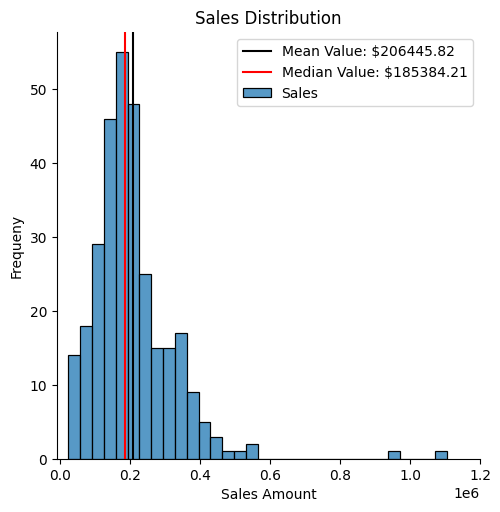

In [85]:
# A distribution of daily sales
sns.displot(daily_sales,x='Sales',label='Sales')
plt.axvline(daily_sales['Sales'].mean(),color='black',label=f"Mean Value: ${daily_sales['Sales'].mean():.2f}")
plt.axvline(daily_sales['Sales'].median(),color='red',label=f"Median Value: ${daily_sales['Sales'].median():.2f}")
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequeny')
plt.xlim(-10000,1200000)
plt.legend()

In [86]:
# Adding visuals to report
doc.add_heading("Visualizations of 'Daily Sales' Before Removing Outliers",level=4)
doc.add_paragraph("Histogram showing distribution:")
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Daily Sales Histogram with Outliers.png")
doc.add_paragraph("It's clear that there are a few extreme outliers in the data.")

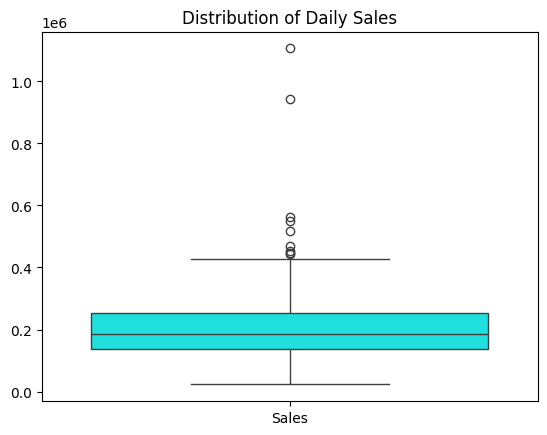

In [87]:
# A different perspective on daily sales
sns.boxplot(daily_sales,color='cyan')
plt.title("Distribution of Daily Sales")
plt.show()

In [88]:
# Adding to my report
doc.add_paragraph("Box Plot showing distribution:")
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Daily Sales BoxPlot with Outliers.png")
doc.add_paragraph("This extra perspective confirms the existence of extreme outliers.")
doc.add_paragraph("-"*50)

# Task 10: Removing Outliers
***

***
For the statistical analysis, I'm going to remove the outliers; my thinking on this is that even though those significantly larger transactions did happen, they are not 'normal every-day' transactions, therefore they need to be removed to take a more realistic look at the common expected sales performance of the business.
***

***
I'm going to remove outliers using a few different methods, and then I'll plot the different dataframes for visual comparison.
***

## Z-Scores
***

In [89]:
# Removing outliers with z-scores
daily_sales['Z-Scores'] = (daily_sales['Sales'] - daily_sales['Sales'].mean()) / daily_sales['Sales'].std()

# Setting my limit
z_limit = 3

# Variable holding the results with the outliers removed
z_adj_daily_sales = daily_sales[(daily_sales['Z-Scores'] < z_limit) & (daily_sales['Z-Scores'] > -z_limit)]

## Mean Absolute Deviation
***

In [90]:
# Calculating the median absolute deviation
MAD = (np.abs(daily_sales['Sales'] - daily_sales['Sales'].median())).median()

# Setting my limit
MAD_limit = MAD * 3

# Finding the median
median = daily_sales['Sales'].median()

# Filtering by median absolute deviation
MAD_adj_daily_sales = daily_sales[(daily_sales['Sales'] < median + MAD_limit) & (daily_sales['Sales'] > median - MAD_limit)]

## Comparing Methods
***

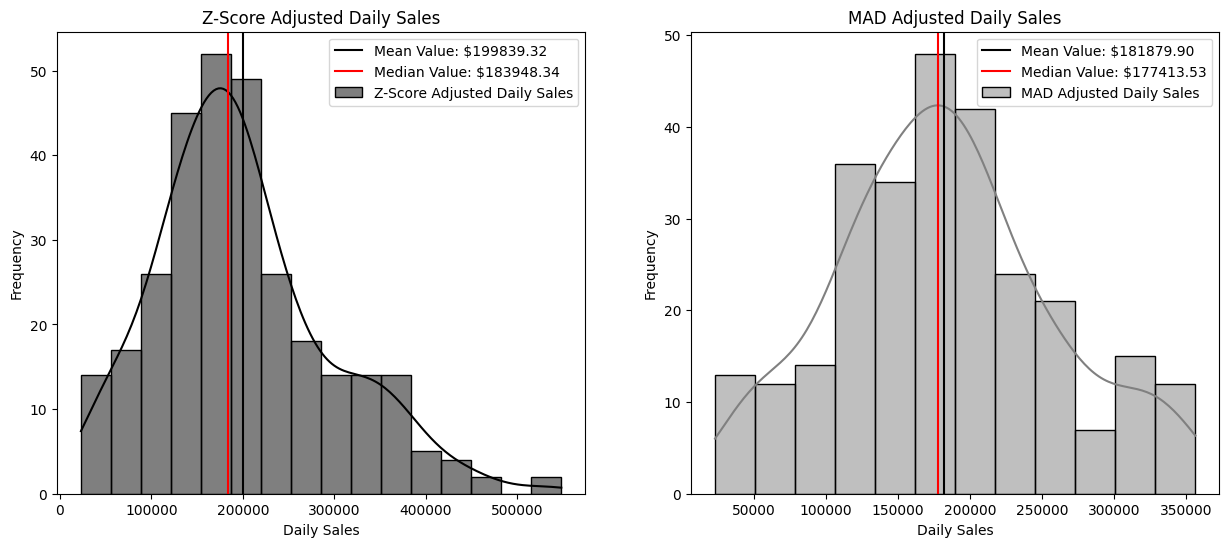

In [91]:
# Plotting the two adjusted data frames

fig,axs = plt.subplots(1,2,figsize=(15,6))

sns.histplot(z_adj_daily_sales['Sales'],ax=axs[0],color='black',kde=True,label="Z-Score Adjusted Daily Sales")
axs[0].axvline(z_adj_daily_sales['Sales'].mean(),color='black',
            label=f"Mean Value: ${z_adj_daily_sales['Sales'].mean():.2f}")
axs[0].axvline(z_adj_daily_sales['Sales'].median(),color='red',
            label=f"Median Value: ${z_adj_daily_sales['Sales'].median():.2f}")
axs[0].set_title("Z-Score Adjusted Daily Sales")
axs[0].set_xlabel("Daily Sales")
axs[0].set_ylabel("Frequency")
axs[0].legend(loc='best')


sns.histplot(MAD_adj_daily_sales['Sales'],ax=axs[1],color='gray',kde=True,label="MAD Adjusted Daily Sales")
axs[1].axvline(MAD_adj_daily_sales['Sales'].mean(),color='black',
            label=f"Mean Value: ${MAD_adj_daily_sales['Sales'].mean():.2f}")
axs[1].axvline(MAD_adj_daily_sales['Sales'].median(),color='red',
            label=f"Median Value: ${MAD_adj_daily_sales['Sales'].median():.2f}")
axs[1].set_title("MAD Adjusted Daily Sales")
axs[1].set_xlabel("Daily Sales")
axs[1].set_ylabel("Frequency")
axs[1].legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


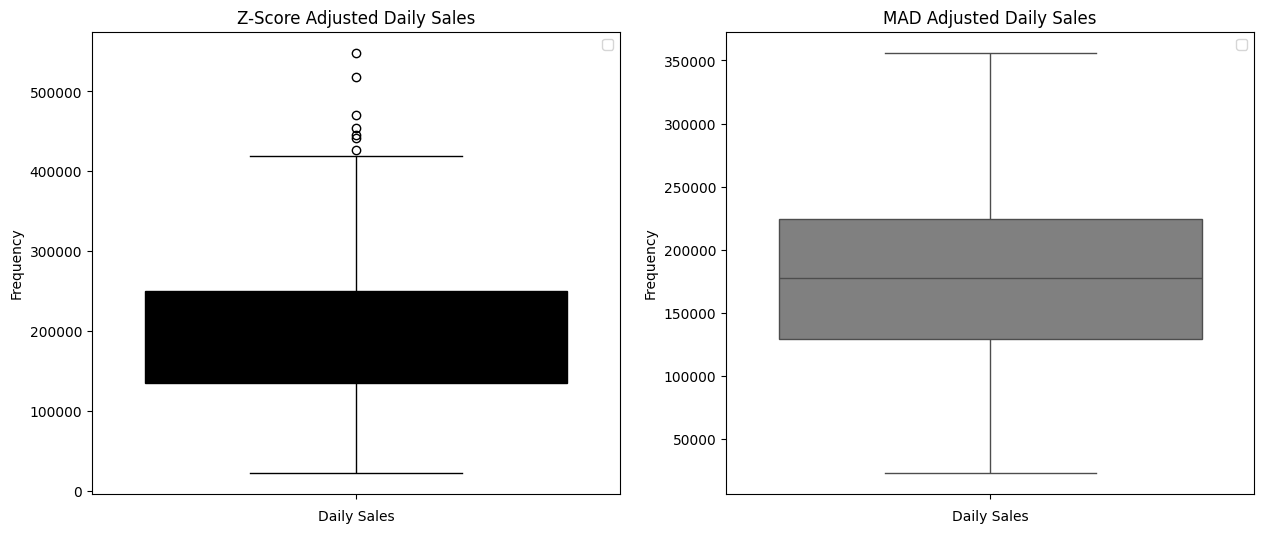

In [92]:
# Another perspective
fig,axs = plt.subplots(1,2,figsize=(15,6))

sns.boxplot(z_adj_daily_sales['Sales'],ax=axs[0],color='black')
axs[0].set_title("Z-Score Adjusted Daily Sales")
axs[0].set_xlabel("Daily Sales")
axs[0].set_ylabel("Frequency")
axs[0].legend(loc='best')


sns.boxplot(MAD_adj_daily_sales['Sales'],ax=axs[1],color='gray')
axs[1].set_title("MAD Adjusted Daily Sales")
axs[1].set_xlabel("Daily Sales")
axs[1].set_ylabel("Frequency")
axs[1].legend(loc='best')

## Calculating the spreads
***

In [93]:
z_score_spread = np.abs(z_adj_daily_sales['Sales'].mean() - z_adj_daily_sales['Sales'].median())
MAD_spread = np.abs(MAD_adj_daily_sales['Sales'].mean() - MAD_adj_daily_sales['Sales'].median())

print(f"Z-Score spread: {z_score_spread}")
print(f"MAD spread: {MAD_spread}")

Z-Score spread: 15890.988708609279
MAD spread: 4466.360251798556


### Observation
***

***
Median Absolute Deviation looks to do a better job at removing outliers and showing a balanced distribution of the data and reducing the spread between the median and the mean. The MAD adjusted box plot contains no outliers, while the z-score adjusted box plot still has several.
***

In [94]:
# For my report
note = f"""It's clear that Mean Absolute Deviation (MAD) gives a more balanced distribution of the dataset. The spread between the median and the mean is tighter(z_score mean/median spread: {z_score_spread}; MAD spread: {MAD_spread}), which is something I always look for as a sign of balance. MAD will be used to remove the outliers from the data."""
doc.add_heading('Visualization of Distribution of Daily Sales After Removing Outliers via Z-Scores and Mean Absolute Deviation:',level=2)
doc.add_paragraph(note)
doc.add_heading("Visualizing the Distributions with Histograms",level=3)
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Z-Score Adjusted Set vs MAD Adjusted Set Histograms.png")
doc.add_heading("Visualizing the Distributions with Box Plots",level=3)
doc.add_picture("C:/Users/there/Desktop/KaggleProject/MAD Adjusted Set vs MAD Adjusted Set Box Plots.png")
doc.add_paragraph("-"*50)

***
I'm going assign the median absolute deviation adjusted set to daily_sales.
***

# Reassigning Data Frames
***

In [95]:
daily_sales = MAD_adj_daily_sales
monthly_sales = monthly_sales = daily_sales.groupby(pd.Grouper(key='Date',freq='M')).agg({'Sales': 'sum'}).reset_index()
annual_sales = annual_sales = daily_sales.groupby(pd.Grouper(key='Date',freq='Y')).agg({'Sales':'sum'}).reset_index()

In [96]:
# Checking my work
# daily_sales.head()
# monthly_sales.head()
# annual_sales.head()

# Task 11: Plotting the Time-Series Data
***

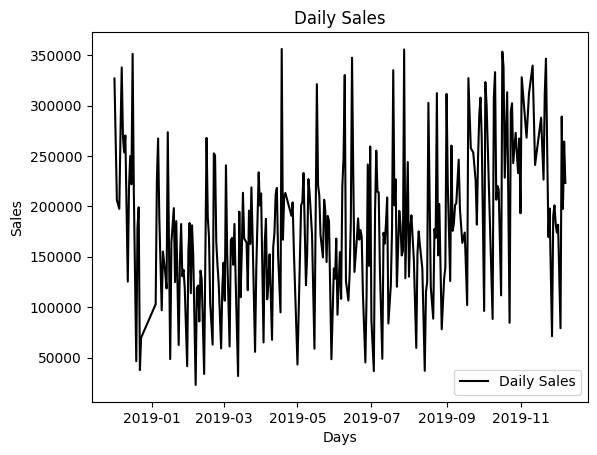

In [97]:
# Plotting daily, monthly, and annual sales data
sns.lineplot(x=daily_sales['Date'],y=daily_sales['Sales'],color='black',label='Daily Sales')
plt.title("Daily Sales")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.legend()
plt.show()

## Trying to smooth daily sales data
***

### 9-Moving Average
***

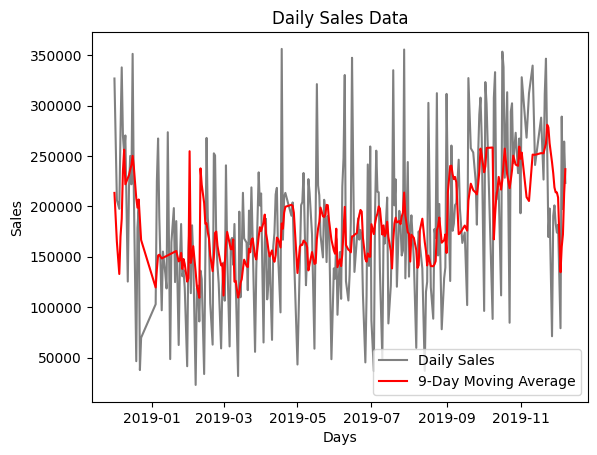

In [98]:
# Using a moving average to try and smooth the daily sales data
# testing variable
testing = daily_sales.copy()

testing['9_Day_MovAvg'] = testing['Sales'].rolling(window=9).mean()
sns.lineplot(x=testing['Date'],y=testing['Sales'],color='gray',label='Daily Sales')
sns.lineplot(x=testing['Date'],y=testing['9_Day_MovAvg'],color='red',label="9-Day Moving Average")
plt.title('Daily Sales Data')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.show()

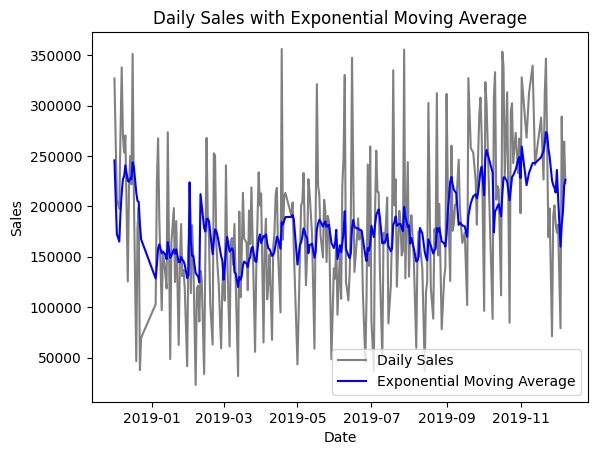

In [99]:
# Exponential Moving Average
testing['ExpMovAvg'] = testing['Sales'].ewm(span=14, adjust=False).mean()

sns.lineplot(x=testing['Date'],y=testing['Sales'],color='gray',label='Daily Sales')
sns.lineplot(x=testing['Date'],y=testing['ExpMovAvg'],color='blue',label='Exponential Moving Average')
plt.title("Daily Sales with Exponential Moving Average")
plt.xlabel("Date")
plt.ylabel('Sales')
plt.legend()
plt.show()

### Resampling to Weekly Data
***

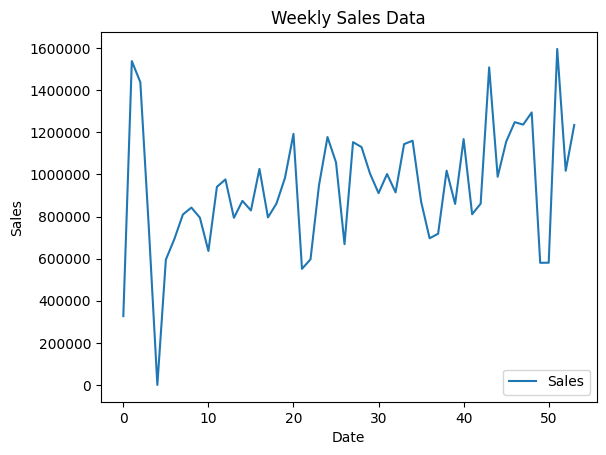

In [100]:
# Resampling to weekly
weekly_sales = daily_sales.resample('W', on='Date').sum().reset_index()

sns.lineplot(weekly_sales[['Sales']])
plt.title("Weekly Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

### Observation
***
The moving average didn't give the results I wanted, but resampling to weekly did; this is much more readable, and it shows an uptrend over time.

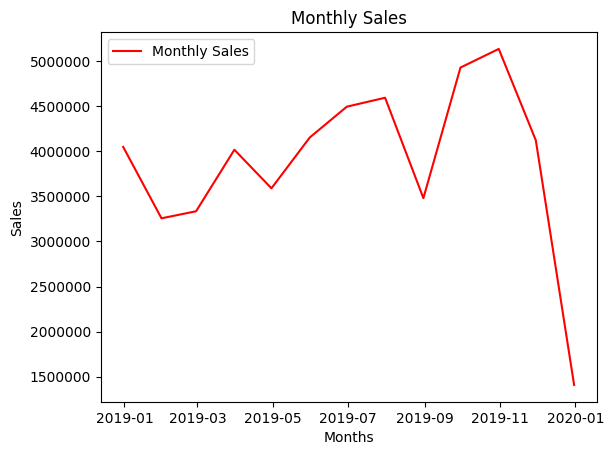

In [101]:
sns.lineplot(x=monthly_sales['Date'],y=monthly_sales['Sales'],color='red',label='Monthly Sales')
plt.title("Monthly Sales")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

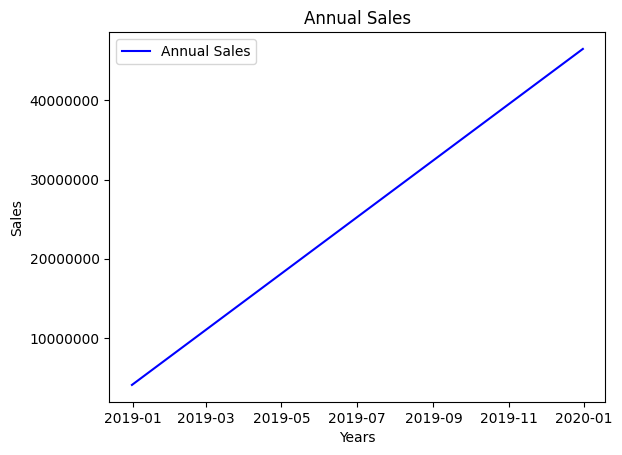

In [102]:
sns.lineplot(x=annual_sales['Date'],y=annual_sales['Sales'],color='blue',label='Annual Sales')
plt.title("Annual Sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

In [103]:
# For my report
note1 = f"""During plotting the daily, monthly, and annual sales I saw that the daily sales data was quite noisy; this is common due to sales and discounts and other special events and deals. I tried to smooth the data to some extent by adding the 9-Day Moving Average to the graph overlapping the data:"""
doc.add_heading("Visualizing Time-Series Sales Data",level=3)
doc.add_paragraph(note1)
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Daily Sales with 9-Moving Average.png")
note2 = f"""When that didn't offer much insight, I tried the same visualization with the exponential moving average:"""
doc.add_paragraph(note2)
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Daily Sales with Exponential Moving Average.png")
note3 = f"""While the exponential moving average was slightly better, I ultimately decided to resameple the data to weekly sales to get rid of all the noise:"""
doc.add_paragraph(note3)
doc.add_heading("All Time-Series Visuals:",level=4)
doc.add_heading("Weekly Sales:",level=5)
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Weekly Sales Data.png")
doc.add_heading("Monthly Sales:",level=5)
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Monthly Sales Data.png")
doc.add_heading("Annual Sales:",level=5)
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Annual Sales.png")
doc.add_paragraph("-"*50)

# Task 12: Plotting Categorical Data
***

## Top 20 Customers
***

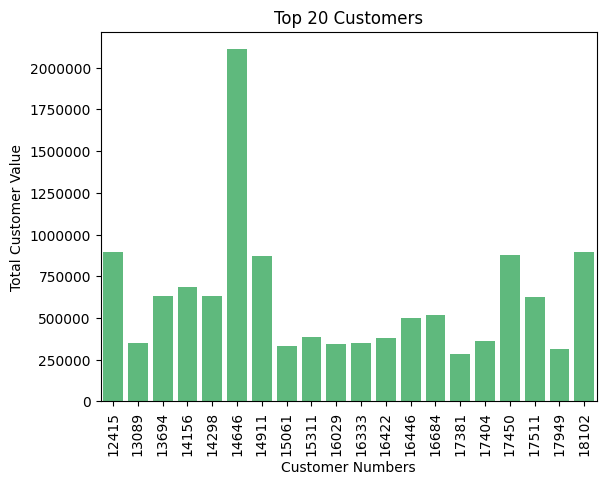

In [104]:
# Plotting top 20 customers
sns.barplot(x=top_20_customers['CustomerNo'].astype(int),y=top_20_customers['TotalCustomerValue'],color="#50C878")
plt.title("Top 20 Customers")
plt.xlabel("Customer Numbers")
plt.ylabel("Total Customer Value")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Revenue by Country
***

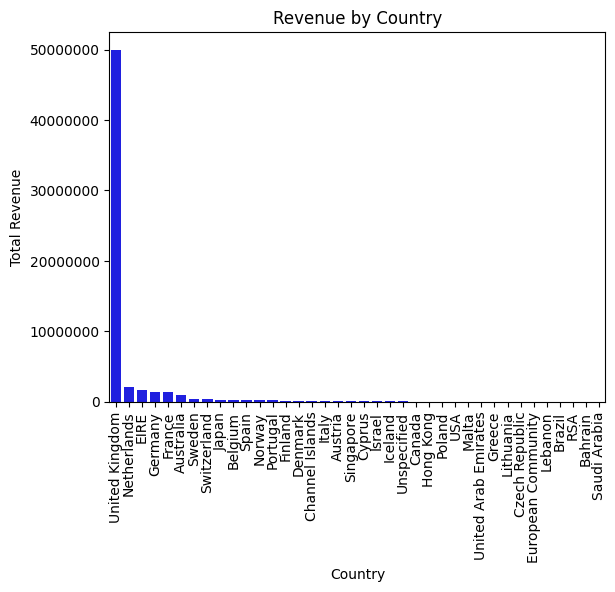

In [105]:
#plt.figure(figsize=(8,5))
sns.barplot(x=rev_by_country_sorted['Country'],y=rev_by_country_sorted['TotalRevenue'],color="blue")
plt.title("Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Top 20 Products by Quantity
***

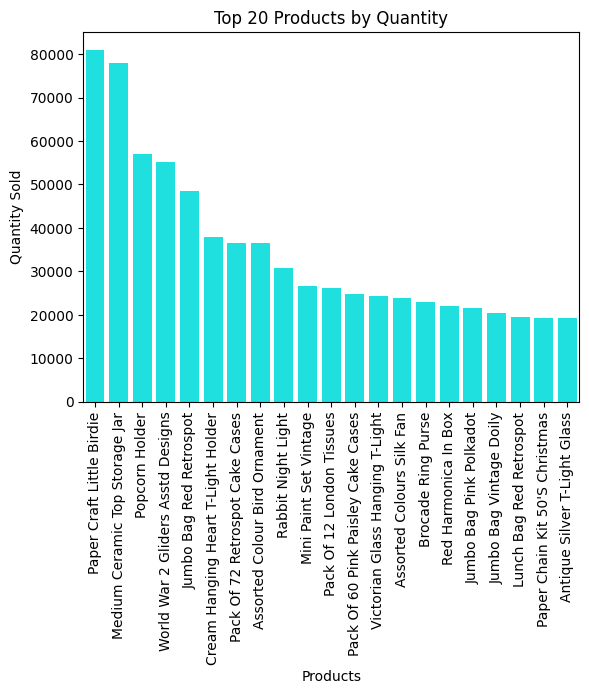

In [106]:
# Top 20 Products by Quantity
sns.barplot(x=top_20_prod_by_quantity['ProductName'],y=top_20_prod_by_quantity['Quantity'],color='cyan')
plt.title("Top 20 Products by Quantity")
plt.xlabel("Products")
plt.xticks(rotation=90)
plt.ylabel("Quantity Sold")
plt.show()

## Top 20 Products by Revenue
***

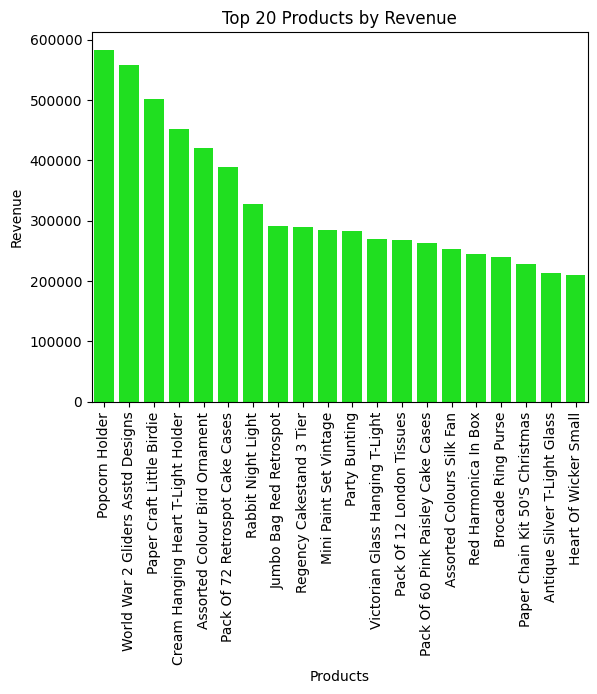

In [107]:
# Top 20 Products by Revenue
sns.barplot(x=top_20_prod_by_revenue['ProductName'],y=top_20_prod_by_revenue['Revenue'],color='lime')
plt.title("Top 20 Products by Revenue")
plt.xlabel("Products")
plt.xticks(rotation=90)
plt.ylabel("Revenue")
plt.show()

In [108]:
# For my report
doc.add_heading("Findings:",1)
doc.add_paragraph("The number one customer is customer no. 14646.")
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Top 20 Customers.png")
doc.add_paragraph("The United Kingdom is by far the number one country by revenue.")
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Top Country by Revenue.png")
doc.add_paragraph("I found the number one procduct by quantity was the Paper Craft Little Birdie.")
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Top 20 Products by Quantity.png")
doc.add_paragraph("The number one product by revenue was the Popcorn Holder.")
doc.add_picture("C:/Users/there/Desktop/KaggleProject/Top 20 Products by Revenue.png")
doc.add_paragraph("For in-depth visualizations, see the dashboard.")

# Saving my work for visualization

In [109]:
# Gathering dataframes and sending them to csv
# daily_sales.to_csv("C:/Users/there/Desktop/KaggleProject/DAILYSALES.csv")
# weekly_sales.to_csv("C:/Users/there/Desktop/KaggleProject/WEEKLYSALES.csv")
# monthly_sales.to_csv("C:/Users/there/Desktop/KaggleProject/MONTHLYSALES.csv")
# annual_sales.to_csv("C:/Users/there/Desktop/KaggleProject/ANNUALSALES.csv")
# rev_by_country_sorted.to_csv("C:/Users/there/Desktop/KaggleProject/REVENUE BY COUNTRY.csv")
# top_20_customers.to_csv("C:/Users/there/Desktop/KaggleProject/TOP20CUSTOMERS.csv")
# top_20_prod_by_quantity.to_csv("C:/Users/there/Desktop/KaggleProject/TOP 20 PRODUCTS BY QUANTITY.csv")
# top_20_prod_by_revenue.to_csv("C:/Users/there/Desktop/KaggleProject/TOP 20 PRODUCTS BY REVENUE.csv")

In [110]:
# Saving my report
#doc.save(my_report)